In [7]:
import sys
# append the path of the parent directory
sys.path.append("..")

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

import seaborn as sns
import time
import json
import pandas as pd
from ctypes import c_int32
from itertools import product


from importlib import reload

from lib import sketches
reload(sketches)

from lib.sketches import minimal_b_adic_cover, sort_b_adic_ranges, BAdicRange, visualize_badic_cover, BAdicCube, plot_b_adic_cubes

In [9]:
def minimal_spatial_b_adic_cover(bounds: list, bases: list):
        assert len(bounds) == len(bases)
        # For now we asume only 2D
        assert len(bounds) == 2

        minimal_b_adic_covers = []
        for i in range(len(bounds)):
            minimal_b_adic_covers.append(minimal_b_adic_cover(bases[i], bounds[i][0], bounds[i][1]))

        combinations = product(*minimal_b_adic_covers)

        D = list()
        for combination in combinations:
            # For now hard coded to 2D
            b_adic_x = combination[0]
            b_adic_y = combination[1]

            if b_adic_x.level < b_adic_y.level:
                level_diff = b_adic_y.level - b_adic_x.level
                scale = bases[1]**level_diff
                temp_index = b_adic_y.index * scale
                for i in range(scale):
                    temp = BAdicRange(bases[1], b_adic_x.level, temp_index)
                    D.append(BAdicCube([b_adic_x, temp], b_adic_x.level, 0))
                    temp_index += 1        
            elif b_adic_x.level > b_adic_y.level:
                level_diff = b_adic_x.level - b_adic_y.level
                scale = bases[0]**level_diff
                temp_index = b_adic_x.index * scale
                for i in range(scale):
                    temp = BAdicRange(bases[0], b_adic_y.level, temp_index)
                    D.append(BAdicCube([temp, b_adic_y], b_adic_y.level, 0))
                    temp_index += 1
            else:
                D.append(BAdicCube([b_adic_x, b_adic_y], b_adic_x.level, 0))

        return np.asarray(D)

NameError: name 'patches' is not defined

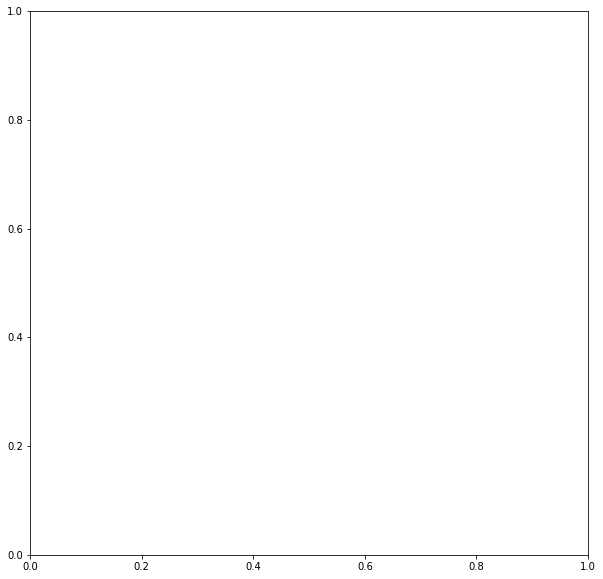

In [43]:
bounds = [(0, 25), (-1, 25)]
bases = [5, 5]

# bounds = [(-10, 20), (1, 20)]
# bases = [5, 2]
cubes = minimal_spatial_b_adic_cover(bounds, bases)
# for d in cubes:
#     print(d)
    
plot_b_adic_cubes(cubes)

[-25, -24) ; base = 5 ; level = 0 ; index = -25
[-24, -23) ; base = 5 ; level = 0 ; index = -24
[-23, -22) ; base = 5 ; level = 0 ; index = -23
[-22, -21) ; base = 5 ; level = 0 ; index = -22
[-21, -20) ; base = 5 ; level = 0 ; index = -21
[-20, -19) ; base = 5 ; level = 0 ; index = -20
[-19, -18) ; base = 5 ; level = 0 ; index = -19
[-18, -17) ; base = 5 ; level = 0 ; index = -18
[-17, -16) ; base = 5 ; level = 0 ; index = -17
[-16, -15) ; base = 5 ; level = 0 ; index = -16
[-15, -14) ; base = 5 ; level = 0 ; index = -15
[-14, -13) ; base = 5 ; level = 0 ; index = -14
[-13, -12) ; base = 5 ; level = 0 ; index = -13
[-12, -11) ; base = 5 ; level = 0 ; index = -12
[-11, -10) ; base = 5 ; level = 0 ; index = -11
[-10, -9) ; base = 5 ; level = 0 ; index = -10
[-9, -8) ; base = 5 ; level = 0 ; index = -9
[-8, -7) ; base = 5 ; level = 0 ; index = -8
[-7, -6) ; base = 5 ; level = 0 ; index = -7
[-6, -5) ; base = 5 ; level = 0 ; index = -6
[-5, -4) ; base = 5 ; level = 0 ; index = -5
[-4, -3)

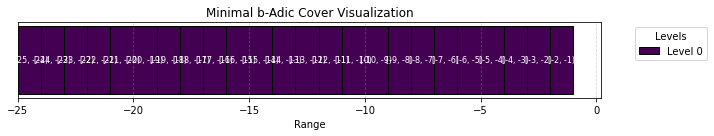

In [53]:
base = 5
low = -25
high = -2

cover = minimal_b_adic_cover(base, low, high)
# cover = sort_b_adic_ranges(cover)
for r in cover:
    print(r)

visualize_badic_cover(cover, show_labels=True)

[1, 2) ; base = 2 ; level = 0 ; index = 1
[2, 4) ; base = 2 ; level = 1 ; index = 1
[4, 8) ; base = 2 ; level = 2 ; index = 1
[8, 16) ; base = 2 ; level = 3 ; index = 1
[16, 20) ; base = 2 ; level = 2 ; index = 4
[20, 21) ; base = 2 ; level = 0 ; index = 20


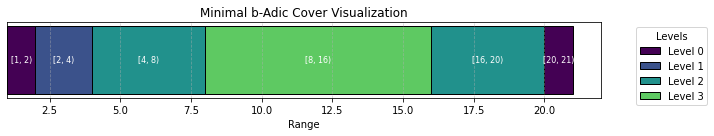

In [28]:
base = 2
low = 1
high = 20

cover = minimal_b_adic_cover(base, low, high)
cover = sort_b_adic_ranges(cover)
for r in cover:
    print(r)

visualize_badic_cover(cover, show_labels=True)

[0, 8) ; base = 2 ; level = 3 ; index = 0
[8, 12) ; base = 2 ; level = 2 ; index = 2
[12, 14) ; base = 2 ; level = 1 ; index = 6
[14, 15) ; base = 2 ; level = 0 ; index = 14


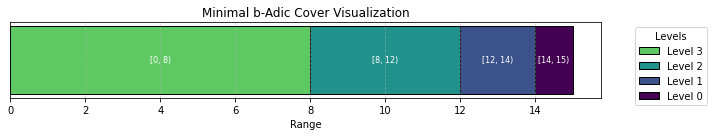

In [ ]:
base = 2
low = 0
high = 1.04

cover = minimal_b_adic_cover(base, low, high)
cover = sort_b_adic_ranges(cover)
for r in cover:
    print(r)

visualize_badic_cover(cover, show_labels=True)